In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from tqdm import tqdm

In [2]:
captions_df = pd.read_csv('../input/flickr-image-dataset/flickr30k_images/results.csv', delimiter='|')
captions_df = captions_df.dropna(how='any')
captions_df.head(10)

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
5,10002456.jpg,0,Several men in hard hats are operating a gian...
6,10002456.jpg,1,Workers look down from up above on a piece of...
7,10002456.jpg,2,Two men working on a machine wearing hard hats .
8,10002456.jpg,3,Four men on top of a tall structure .
9,10002456.jpg,4,Three men on a large rig .


In [3]:
captions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158914 entries, 0 to 158914
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   image_name       158914 non-null  object
 1    comment_number  158914 non-null  object
 2    comment         158914 non-null  object
dtypes: object(3)
memory usage: 4.8+ MB


In [4]:
# let's add start and end tokens to each entry in the captions dataframe

START_TOKEN = '<start>'
END_TOKEN = '<end>'

In [5]:
def add_start_end(text):
    return START_TOKEN + str(text) + END_TOKEN

captions_df['comment'] = captions_df[' comment'].apply(add_start_end)

captions_df.drop(columns=' comment', axis=1, inplace=True)
captions_df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,<start> Two young guys with shaggy hair look a...
1,1000092795.jpg,1,"<start> Two young , White males are outside ne..."
2,1000092795.jpg,2,<start> Two men in green shirts are standing i...
3,1000092795.jpg,3,<start> A man in a blue shirt standing in a ga...
4,1000092795.jpg,4,<start> Two friends enjoy time spent together ...


In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_directory = '../input/flickr-image-dataset/flickr30k_images/flickr30k_images/'
images_path = []
images_ids = []

for file in os.listdir(img_directory):
    if file == 'flickr30k_images':
        continue
    images_ids.append(file)
    images_path.append(os.path.join(img_directory, file))

print(f"Full path of image: {images_path[0]}")
print(images_ids[0])
print(len(images_path))
print(len(images_ids))

Full path of image: ../input/flickr-image-dataset/flickr30k_images/flickr30k_images/2715746315.jpg
2715746315.jpg
31784
31784


In [7]:
# some image parameters
img_height = 256
img_width = 256
n_channels = 3

n_dataset = 15000 # number of images to use for training

In [8]:
# let's store the caption to each image in a list
captions = []
for i in tqdm(range(n_dataset)):
    #img_id = images_path[i].split('/')[5]
    img_id = images_ids[i]
    caption = captions_df[captions_df['image_name'] == img_id]['comment'].values
    captions.append(caption.tolist()[1])
captions[:6]

100%|██████████| 15000/15000 [05:55<00:00, 42.14it/s]


['<start> A man with a large plate of food on his head walks down a street .<end>',
 '<start> A teenage boy on a bicycle does tricks .<end>',
 '<start> Two little white dogs are playing outside in the snow .<end>',
 '<start> The little kids all play and jump around inside the inflatable toy .<end>',
 '<start> A gentleman with a long beard is at a concert playing a fur lined base guitar .<end>',
 '<start> A blond woman wearing a black and orange swimsuit is caught in motion upside down with greenery in the background .<end>']

<start> A guy dressed in a white uniform with a number 3 on it playing soccer .<end>
6224066807.jpg


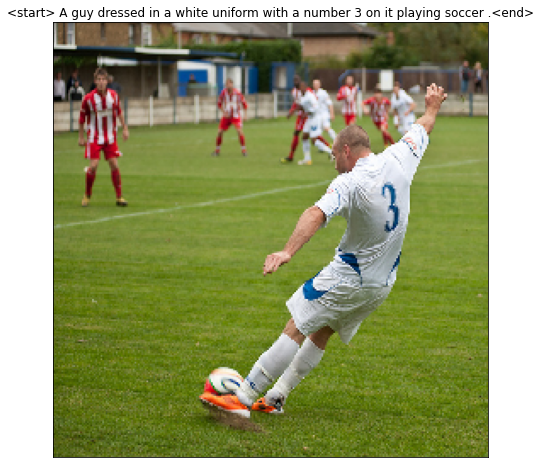

In [9]:
# sanity check
print(captions[9749])
print(images_ids[9749])
plt.figure(figsize=(10, 8))
plt.xticks([])
plt.yticks([])
plt.title(captions[9749])
img_array = load_img(images_path[9749], target_size=(256, 256))
plt.imshow(img_array)

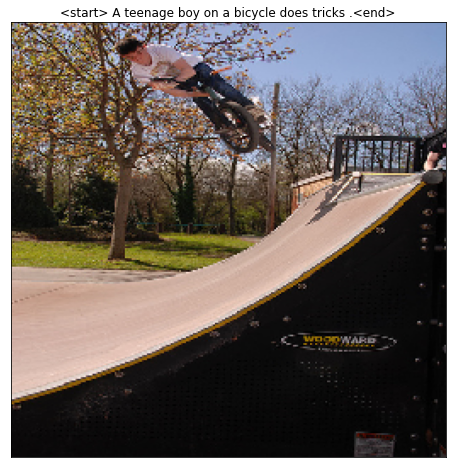

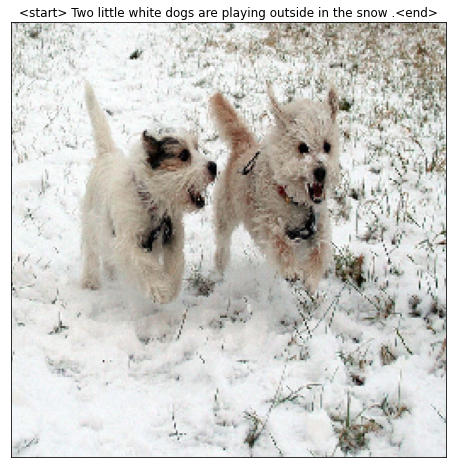

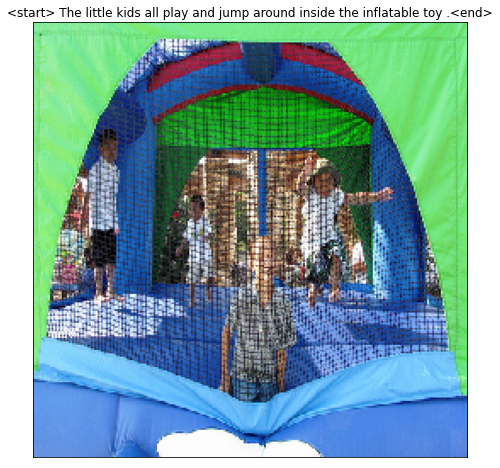

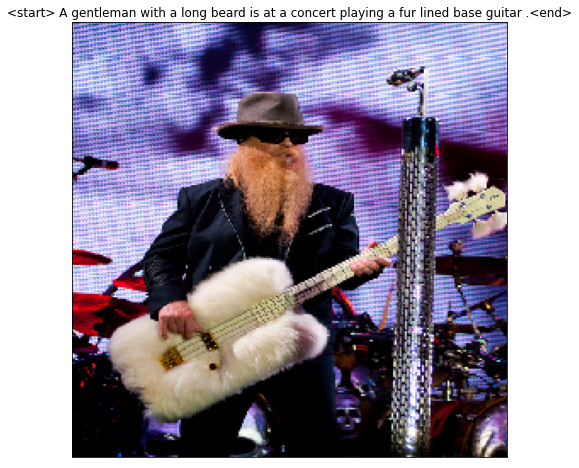

In [10]:
# let's see some of these images
for i in range(1, 5):
    #img_id = images_path[i].split('/')[5]
    img_id = images_ids[i]
    
    # show the image
    plt.figure(figsize=(10, 8))
    plt.xticks([])
    plt.yticks([])
    plt.title(captions[i])
    img_array = load_img(images_path[i], target_size=(256, 256))
    plt.imshow(img_array)
       
plt.show()

## Preparing the text data

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
num_words = 30000
tokenizer = Tokenizer(num_words = num_words, filters='!#$%&()*+,-/:;<=>@«»""[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(captions)

In [13]:
target = tokenizer.texts_to_sequences(captions)
target = pad_sequences(target, maxlen=30, padding='post', truncating='post')

In [14]:
sample = tokenizer.sequences_to_texts(target[15:30])
sample

['start children all dressed the same are standing outside a building . end',
 "start a large brown dog with a blue collar is resting his chin on a man 's face . end",
 'start a man in an apron is pushing a large amount of shopping carts . end',
 'start a man in a red suit using a toothbrush to polish his bicycle rims . end',
 'start three people standing in a group at a park and one man reading at a park . end',
 'start there is a red and yellow cement truck next to a large building . end',
 'start two people dressed as gorillas with pink hats on their heads walking on the sidewalk . end',
 'start two dogs meet and check out a third dog at the beach . end',
 'start a girl with a orange bob holding her hands out in front of some folding t shirts . end',
 'start a man in white pants and a black shirt is playing a saxaphone . end',
 'start four tourists look at a camera while on a beach next to the sea . end',
 'start two young women are sitting in front of a large window overlooking a b

## Preparing the image data

We would be extracting features from the InceptionV3 pretrained model using imagenet's weights. The idea is to instantiate the model using the last Conv2D layer - without the Dense head - to extract the features from the images and then store the features to a dictionary.

In [15]:
image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', 
                                                input_shape=(img_height, img_width, n_channels))

new_input = image_model.input
hidden_layer = image_model.layers[-1].output
print(hidden_layer.shape)

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

2022-07-20 00:27:14.028705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 00:27:14.139854: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 00:27:14.140751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 00:27:14.142119: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 0s 0us/step
(None, 6, 6, 2048)


In [16]:
def preprocess_image(image_directory):
    """Preprocesses the images into format expected by the InceptionV3 model
    
    expects image_directory to be a list of all the image_path to use
    """
    feature_dict = {}
    for img in tqdm(image_directory):
        # get the image id
        img_id = img.split('/')[5]
        
        # load the image and convert to array
        img = load_img(img, target_size=(img_height, img_width))
        img = img_to_array(img)
        
        # preprocess
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        img = tf.keras.applications.inception_v3.preprocess_input(img)
        
        # extract and store in dictionary
        feature = image_features_extract_model(img)
        batch_features = tf.reshape(feature, (-1, feature.shape[3]))
        feature_dict[img_id] = batch_features.numpy()
        
        del img
        gc.collect()
        
    return feature_dict

In [17]:
feature_dict = preprocess_image(images_path[:n_dataset])

100%|██████████| 15000/15000 [1:06:10<00:00,  3.78it/s]


In [18]:
gc.collect()

23

In [19]:
# let's save the feature_dict

import pickle

with open('feature_dict.pickle', 'wb') as handle:
    pickle.dump(feature_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
train_dataset = images_ids[:n_dataset]

In [21]:
print(train_dataset[0])
print(captions[0])
print(feature_dict[train_dataset[0]].shape)

2715746315.jpg
<start> A man with a large plate of food on his head walks down a street .<end>
(36, 2048)


We use TensorFlow's Data API to load the dataset. We need to map the features extracted from the pretrained model to the captions. We do this with the map_func below which will be mapped to the entire dataset.

In [22]:
def map_func(img_name, captions):
    """maps the features extracted from the pretrained model to the captions. 
    
    img_name is the id of each image which serve as the key to the feature_dict
    captions - captions to be mapped to each data
    
    Returns the img_tensor extracted and its captions"""
    img_tensor = feature_dict[img_name.decode('utf-8')]
    return img_tensor, captions

In [23]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = len(tokenizer.word_index)
num_steps = len(feature_dict) // BATCH_SIZE

features_shape = 2048
attention_features_shape = 36

In [24]:
# sanity check

print(train_dataset[0])
print(target[0])
print(tokenizer.sequences_to_texts([target[0]]))

2715746315.jpg
[  3   1  11  12   1  52 832  10 153   8  27 154 128  36   1  39   4   2
   0   0   0   0   0   0   0   0   0   0   0   0]
['start a man with a large plate of food on his head walks down a street . end']


In [25]:
len(target)

15000

In [26]:
# create the dataset with tf.data API
dataset = tf.data.Dataset.from_tensor_slices((train_dataset, target))

# map the function to the dataset
dataset = dataset.map(lambda item1, item2: tf.numpy_function(map_func, [item1, item2], [tf.float32, tf.int32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [27]:
for i, (img_tensor, caption) in enumerate(dataset):
    print(img_tensor)
    print(caption)
    if i == 0: # to run only once
        break
        
       

tf.Tensor(
[[1.0980769  0.         0.54562145 ... 0.         0.3175376  1.3611816 ]
 [0.60200113 0.03595002 0.         ... 0.         0.         2.2934487 ]
 [0.         0.         0.         ... 0.         0.         3.6157632 ]
 ...
 [0.         0.         0.         ... 1.3988211  0.6696674  0.        ]
 [0.1674697  0.         0.         ... 1.3736709  0.08141913 0.        ]
 [0.78644526 0.         0.         ... 1.4237704  0.         0.        ]], shape=(36, 2048), dtype=float32)
tf.Tensor(
[  3   1  11  12   1  52 832  10 153   8  27 154 128  36   1  39   4   2
   0   0   0   0   0   0   0   0   0   0   0   0], shape=(30,), dtype=int32)


2022-07-20 01:33:48.078071: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [28]:
# shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

### Modelling

In [29]:
class CNN_Encoder(tf.keras.Model):
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        self.fc = tf.keras.layers.Dense(embedding_dim)
        
    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

Tutorial on Bahdanau Attention - [Machine Learning Mastery blog](https://machinelearningmastery.com/the-bahdanau-attention-mechanism/)

In [30]:
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
        
    def call(self, features, hidden):
        # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

        # hidden shape == (batch_size, hidden_size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
        
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis)))
        
        score = self.V(attention_hidden_layer)
        attention_weights = tf.nn.softmax(score, axis=1)
        
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector, attention_weights

In [31]:
class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.units, return_sequences=True, return_state=True, 
                                       recurrent_initializer= 'glorot_uniform')
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)
        
        self.attention = BahdanauAttention(self.units)
        
        
    def call(self, x, features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)
        
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        
        output, state = self.gru(x)
        
        x = self.fc1(output)
        
        x = tf.reshape(x, (-1, x.shape[2]))
        x = self.fc2(x)
        
        return x, state, attention_weights
    
    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [32]:
# instantiate the encoder and decoder
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

In [33]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')


def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    
    return tf.reduce_mean(loss_)

In [34]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [35]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    # restoring the latest checkpoint in checkpoint_path
    ckpt.restore(ckpt_manager.latest_checkpoint)

In [36]:
loss_plot = []

In [37]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    
    hidden = decoder.reset_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['start']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        features = encoder(img_tensor) # feed the features extracted to a fully-connected layer
        
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            
            # use teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)
            
    total_loss = (loss/ int(target.shape[1]))
    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    
    return loss, total_loss

In [38]:
from tensorflow.python.ops.numpy_ops import np_config

np_config.enable_numpy_behavior()

In [39]:
import time
EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 50 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss/num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')

Epoch 1 Batch 0 Loss 4.7223
Epoch 1 Batch 50 Loss 3.1988
Epoch 1 Batch 100 Loss 2.8309
Epoch 1 Batch 150 Loss 2.5397
Epoch 1 Batch 200 Loss 2.5201
Epoch 1 Batch 250 Loss 2.4538
Epoch 1 Batch 300 Loss 2.3652
Epoch 1 Batch 350 Loss 2.3014
Epoch 1 Batch 400 Loss 2.5511
Epoch 1 Batch 450 Loss 2.1731
Epoch 1 Loss nan
Time taken for 1 epoch 87.68 sec

Epoch 2 Batch 0 Loss nan
Epoch 2 Batch 50 Loss nan
Epoch 2 Batch 100 Loss nan
Epoch 2 Batch 150 Loss nan
Epoch 2 Batch 200 Loss nan
Epoch 2 Batch 250 Loss nan
Epoch 2 Batch 300 Loss nan
Epoch 2 Batch 350 Loss nan
Epoch 2 Batch 400 Loss nan
Epoch 2 Batch 450 Loss nan
Epoch 2 Loss nan
Time taken for 1 epoch 32.15 sec

Epoch 3 Batch 0 Loss nan
Epoch 3 Batch 50 Loss nan
Epoch 3 Batch 100 Loss nan
Epoch 3 Batch 150 Loss nan
Epoch 3 Batch 200 Loss nan
Epoch 3 Batch 250 Loss nan
Epoch 3 Batch 300 Loss nan
Epoch 3 Batch 350 Loss nan
Epoch 3 Batch 400 Loss nan
Epoch 3 Batch 450 Loss nan
Epoch 3 Loss nan
Time taken for 1 epoch 32.14 sec

Epoch 4 Batch 0 

KeyboardInterrupt: 

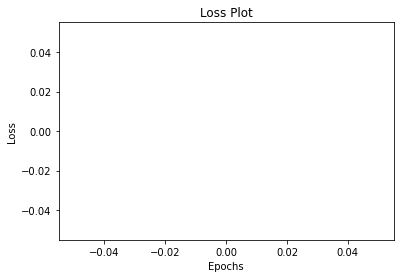

In [40]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Evaluate

In [41]:
max_length = 20

In [42]:
def _evaluate(image):
    hidden = decoder.reset_state(batch_size=1)
    
    # extract the features from the pretrained image
    temp_input = tf.expand_dims(image, 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))
    
    # feed the features to the encoder
    features = encoder(img_tensor_val)
    
    dec_input = tf.expand_dims([tokenizer.word_index['start']], 0)
    results = []
    
    for i in range(max_length):
        predictions, _, _ = decoder(dec_input, features, hidden)
        
        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(tokenizer.index_word[predicted_id])
        
        results.append(predicted_word)
        
        if predicted_word == '<end>':
            return results
        
        dec_input = tf.expand_dims([predicted_id], 0)
    return results
    

In [43]:
def caption(image_path):
    """Function to preprocess an image for captioning and then runs the trained model for inference
    Relies on lower level _evaluate function for inference
    
    """
    
    img = load_img(image_path, target_size=(img_height, img_width))
    result = _evaluate(img)
    
    # plot the image
    plt.figure(figsize=(10, 8))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.title(' '.join(result))

In [44]:
image_path = '../input/flickr-image-dataset/flickr30k_images/flickr30k_images/1000092795.jpg'
caption(image_path)

KeyError: 0

In [45]:
image_path = '../input/flickr-image-dataset/flickr30k_images/flickr30k_images/1009692167.jpg'
caption(image_path)

KeyError: 0